# Vanessa Williams

# Week 3 Exercise

#Importing necessary packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Part 1

#Reading in the data

In [10]:
ds = pd.read_csv('us_pop_data.csv')
ds.head(10)

,year,us_pop
0,1790,3929326
1,1800,5308483
2,1810,7239881
3,1820,9638453
4,1830,12866020
5,1840,17069453
6,1850,23191876
7,1860,31443321
8,1870,39818449
9,1880,50189209


#In order for each line: -Creating a new column with the count of years since 1970 -Creating a new column with the population in the millions

In [57]:
#Calculate the values of the new column, 'years'
ds['years'] = ds['year'] - 1790
#Calulate the values of the new column, 'population'
ds['population'] = ds['us_pop'] / 1_000_000
ds.head(10)

,year,us_pop,years,population,squared_years
0,1790,3929326,0,3.929326,0
1,1800,5308483,10,5.308483,100
2,1810,7239881,20,7.239881,400
3,1820,9638453,30,9.638453,900
4,1830,12866020,40,12.866020,1600
5,1840,17069453,50,17.069453,2500
6,1850,23191876,60,23.191876,3600
7,1860,31443321,70,31.443321,4900
8,1870,39818449,80,39.818449,6400
9,1880,50189209,90,50.189209,8100


#Plotting the Years(x_value) vs Population(y_value)

Text(0, 0.5, 'Population')

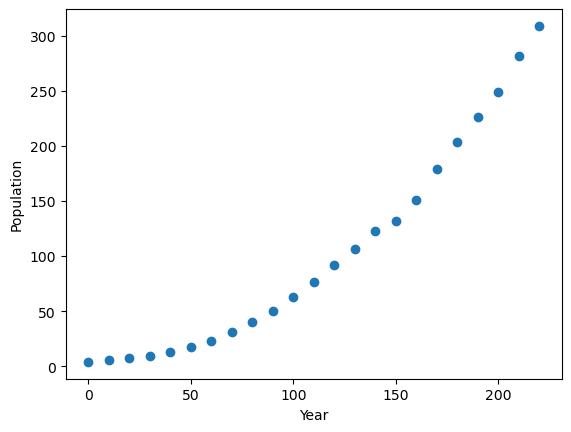

In [17]:
plt.scatter(ds.years,ds.population)
plt.xlabel('Year')
plt.ylabel('Population')

#Preparing data: 
-Independent values (years) -Dependant values (population)

In [20]:
x = ds['years'].values.reshape(-1,1)
y = ds['population'].values

#In order for each line:
-Splitting the data into training and testing sets
-Creating and training the model
-Make the prediction
-Evaluating the model
-Printing the R² value

In [63]:
#Split the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
#Create a linear regression model and fit x_train, y_train data 
model = LinearRegression()
model.fit(x_train, y_train)
#Predict using the x_test data
y_pred = model.predict(x_test)
#Calculate the R^2
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

R^2 Score: 0.6949714808709466


#Creating another column that is the square of

In [28]:
ds['squared_years'] = ds['years']**2
ds.head(10)

,year,us_pop,years,population,squared_years
0,1790,3929326,0,3.929326,0
1,1800,5308483,10,5.308483,100
2,1810,7239881,20,7.239881,400
3,1820,9638453,30,9.638453,900
4,1830,12866020,40,12.866020,1600
5,1840,17069453,50,17.069453,2500
6,1850,23191876,60,23.191876,3600
7,1860,31443321,70,31.443321,4900
8,1870,39818449,80,39.818449,6400
9,1880,50189209,90,50.189209,8100


#In order for each line:
-Splitting the data into training and testing sets
-Creating and training the model
-Make the prediction
-Evaluating the model
-Printing the R² value


In [61]:
#Split the data into train and test datasets
x_value = ds['squared_years'].values.reshape(-1,1)
#Create a linear regression model and fit using x_tr, y_tr data 
x_tr, x_ts, y_tr, y_ts = train_test_split(x_value, y, random_state=42)
model = LinearRegression()
model.fit(x_tr, y_tr)
#Predict using the x_tr data
y_predict = model.predict(x_ts)
#Calculate the R^2
r_square = r2_score(y_ts, y_predict)
print(f'R^2 Score: {r_square}')

R^2 Score: 0.9944697996880941


#Below: I am plotting the data of each linear regression created and comparing them to each other
It is very evident that the regression line for the squared years is far off from the data. This is also
apparant in the R² values for each line

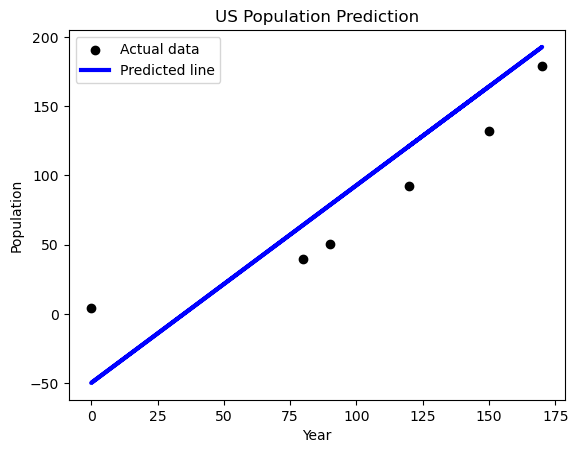

In [34]:
plt.scatter(x_test, y_test, color='black', label='Actual data')
plt.plot(x_test, y_pred, color='blue', linewidth=3, label='Predicted line')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('US Population Prediction')
plt.legend()
plt.show()

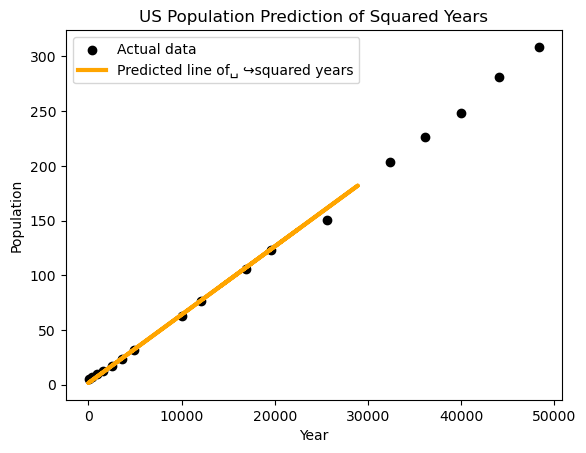

In [40]:
plt.scatter(x_tr, y_tr, color='black', label='Actual data')
plt.plot(x_ts, y_predict, color='orange', linewidth=3, label='Predicted line of␣ ↪squared years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('US Population Prediction of Squared Years')
plt.legend()
plt.show()

#Answer: The second linear regression model looks better. More data points are on the line or very close to the line. 
#The second regression model is better. 
#This is reflective in the R^2. R^2 of the first model equals  0.6949714808709466
#R^2 of the second models equals: 0.9944697996880941. 
#The second R^2 > first R^2. Therefore, the second model is better. 

# Part 2

#Importing customer spending data from file upload

In [42]:
df = pd.read_csv('customer_spending.csv')
print(df)

     ann_spending
0           34112
1           33266
2           36610
3           27381
4           46100
..            ...
435         73302
436         48372
437         77407
438         17834
439          7589

[440 rows x 1 columns]


(array([150., 179.,  69.,  24.,   7.,   4.,   1.,   1.,   1.,   4.]),
 array([   904. ,  20802.7,  40701.4,  60600.1,  80498.8, 100397.5,
        120296.2, 140194.9, 160093.6, 179992.3, 199891. ]),
 <BarContainer object of 10 artists>)

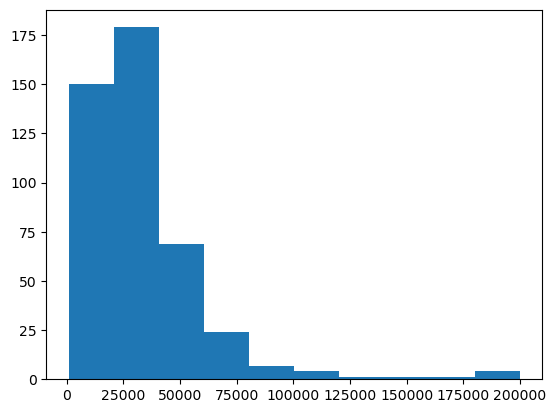

In [44]:
data = (df.ann_spending)
plt.hist(data)

(array([  1.,   2.,   6.,   8.,  53., 103., 153.,  86.,  20.,   8.]),
 array([ 9.82017896, 10.59904647, 11.37791397, 12.15678147, 12.93564897,
        13.71451648, 14.49338398, 15.27225148, 16.05111899, 16.82998649,
        17.60885399]),
 <BarContainer object of 10 artists>)

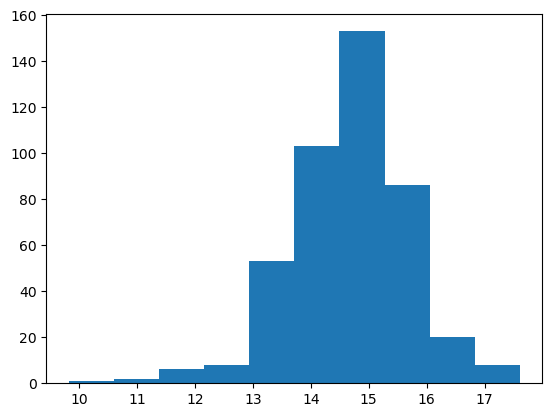

In [48]:
data = np.log2(df.ann_spending)
plt.hist(data)

#Answer: the log transformation reduces or removes the skewness of our original data. log transformation is very easy to apply and quite beneficial for statistical modeling. The histogram looks more like a normal distribution with the log data.